In [1]:
#Source:https://gatech.instructure.com/courses/62736/files/folder/Advanced%20DNN%20Software%20%26%20Tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test1, Y_test) = fashion_mnist.load_data()


In [2]:
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(10000, 28,28,1).astype('float32') / 255.0
X_test = X_test1.reshape(10000, 28,28,1).astype('float32') / 255.0


In [3]:
train_rand_idxs = np.random.choice(50000, 6000)
val_rand_idxs = np.random.choice(10000, 1000)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model.add(Dense(units=2, input_dim=28*28, activation='relu'))
#model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

hist = model.fit(X_train, Y_train, epochs=5, batch_size=10, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
____

10000/10000 [==============================] - 6s 635us/sample - loss: 0.4984 - acc: 0.8213
Test loss: 0.4984319573044777
Test accuracy: 0.8213


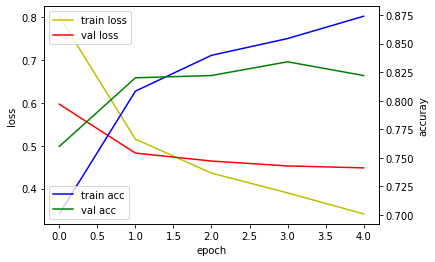

In [6]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
(OX_train, OY_train), (OX_test, OY_test) = mnist.load_data()

OX_test_reshape = OX_test.reshape(10000, 28,28,1).astype('float32') / 255.0

Opredictions = model.predict(OX_test_reshape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

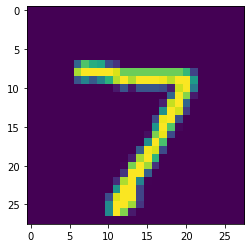

Sandal


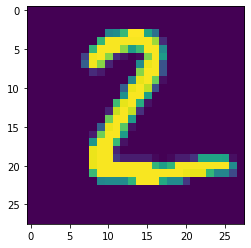

Sandal


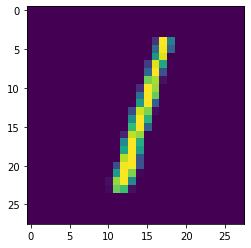

Trouser


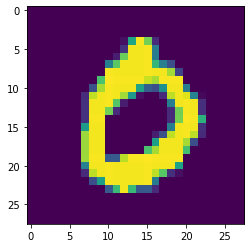

Sandal


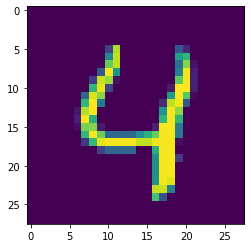

Sandal


In [9]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(class_names[np.argmax(Opredictions[i])])

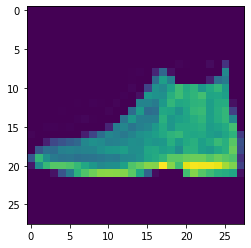

Ankle boot


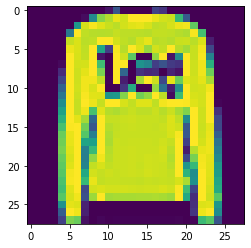

Pullover


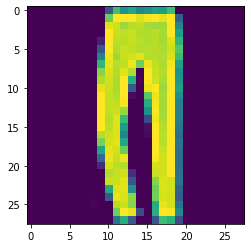

Trouser


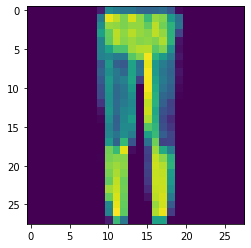

Trouser


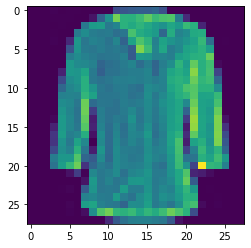

Shirt


In [10]:
Xpredictions = model.predict(X_test)

for i in range(5):
    plt.imshow(X_test1[i])
    plt.show()
    print(class_names[np.argmax(Xpredictions[i])])